In [34]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
#taking cleaned data i.e in Reviews table  from final sql database
#making connection with database 
conn = sqlite3.connect('final.sqlite') 
final = pd.read_sql_query(""" SELECT * FROM Reviews ORDER BY Time""", conn) 


In [35]:
final = final[:60000]
print(len(final))

60000


In [36]:
print(len(final))

60000


In [37]:
CleanedText = final['CleanedText'];
#print(CleanedText)

In [38]:
CleanedText_Class = [];
for i in final['Score']:
    if (i == 'positive'):
        CleanedText_Class.append(1)
    else:
        CleanedText_Class.append(0)
    

CleanedText_Class 
type(CleanedText_Class)

list

In [39]:
text=final.CleanedText.values
print(type(text))

<class 'numpy.ndarray'>


In [40]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
# ====================================
# split the data set into train and test for BoW
#X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
X_1, X_test, y_1, y_test = cross_validation.train_test_split(text, CleanedText_Class, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

In [41]:
y_tr = np.array(y_tr)
print(y_tr.shape)

(29400,)


In [42]:
y_cv = np.array(y_cv)

In [43]:
y_1 = np.array(y_1)

# BOW 

In [44]:
#BOW 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vocabulary= vectorizer.fit(X_tr)
#print("the shape of out text BOW vectorizer ",vocabulary.get_shape())
#bow_x_tr.shape
# bow_tr_array

In [45]:
bow_x_tr= vectorizer.transform(X_tr)
print("the shape of out text BOW vectorizer ",bow_x_tr.get_shape())

the shape of out text BOW vectorizer  (29400, 21148)


In [74]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# bow_x_tr= vectorizer.fit_transform(X_tr)
# print("the shape of out text BOW vectorizer ",bow_x_tr.get_shape())
#bow_x_tr.shape
# bow_tr_array

## CV to BOW

In [46]:
bow_x_cv= vectorizer.transform(X_cv)
print("the shape of out text BOW vectorizer ",bow_x_cv.get_shape())

the shape of out text BOW vectorizer  (12600, 21148)


## test to bow

In [47]:
bow_x_test= vectorizer.transform(X_test)
print("the shape of out text BOW vectorizer ",bow_x_test.get_shape())

the shape of out text BOW vectorizer  (18000, 21148)


## whole training data without cv 

In [48]:
#whole training data without cv 
bow_x_1= vectorizer.fit_transform(X_1)
print("the shape of out text BOW vectorizer ",bow_x_1.get_shape())

the shape of out text BOW vectorizer  (42000, 24834)


## finding optimal k with train and cv data by applying knn with accuracy

In [49]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(bow_x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(bow_x_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
# knn = KNeighborsClassifier(1)
# knn.fit(X_tr,y_tr)
# pred = knn.predict(X_test)
# acc = accuracy_score(y_test, pred, normalize=True) * float(100)
# print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 85%

CV accuracy for k = 3 is 88%

CV accuracy for k = 5 is 88%

CV accuracy for k = 7 is 88%

CV accuracy for k = 9 is 88%

CV accuracy for k = 11 is 88%

CV accuracy for k = 13 is 88%

CV accuracy for k = 15 is 88%

CV accuracy for k = 17 is 88%

CV accuracy for k = 19 is 88%

CV accuracy for k = 21 is 88%

CV accuracy for k = 23 is 88%

CV accuracy for k = 25 is 88%

CV accuracy for k = 27 is 88%

CV accuracy for k = 29 is 88%


## finding optimal k with train and cv data by applying knn with micro f1_score

In [56]:
from sklearn.metrics import f1_score
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(bow_x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(bow_x_cv)

    # evaluate CV accuracy
    acc = f1_score(y_cv, pred, average='micro') * float(100)
    print('\nCV macro f1_score for k = %d is %d%%' % (i, acc))


CV macro f1_score for k = 1 is 85%

CV macro f1_score for k = 3 is 88%

CV macro f1_score for k = 5 is 88%

CV macro f1_score for k = 7 is 88%

CV macro f1_score for k = 9 is 88%

CV macro f1_score for k = 11 is 88%

CV macro f1_score for k = 13 is 88%

CV macro f1_score for k = 15 is 88%

CV macro f1_score for k = 17 is 88%

CV macro f1_score for k = 19 is 88%

CV macro f1_score for k = 21 is 88%

CV macro f1_score for k = 23 is 88%

CV macro f1_score for k = 25 is 88%

CV macro f1_score for k = 27 is 88%

CV macro f1_score for k = 29 is 88%


# finding optimal k with train and cv data by applying knn with algo kdtree

In [145]:
for i in tqdm(range(1,30,2)):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', leaf_size=30)

    # fitting the model on crossvalidation train
    knn.fit(bow_x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(bow_x_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]


CV accuracy for k = 1 is 85%


  7%|█████▌                                                                             | 1/15 [00:15<03:43, 15.98s/it]


CV accuracy for k = 3 is 88%


 13%|███████████                                                                        | 2/15 [00:32<03:28, 16.07s/it]


CV accuracy for k = 5 is 88%


 20%|████████████████▌                                                                  | 3/15 [00:51<03:23, 16.95s/it]


CV accuracy for k = 7 is 88%


 27%|██████████████████████▏                                                            | 4/15 [01:10<03:13, 17.55s/it]


CV accuracy for k = 9 is 88%


 33%|███████████████████████████▋                                                       | 5/15 [01:29<03:01, 18.12s/it]


CV accuracy for k = 11 is 88%


 40%|█████████████████████████████████▏                                                 | 6/15 [01:48<02:45, 18.42s/it]


CV accuracy for k = 13 is 88%


 47%|██████████████████████████████████████▋                                            | 7/15 [02:08<02:30, 18.81s/it]


CV accuracy for k = 15 is 88%


 53%|████████████████████████████████████████████▎                                      | 8/15 [02:27<02:11, 18.81s/it]


CV accuracy for k = 17 is 88%


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [02:46<01:54, 19.00s/it]


CV accuracy for k = 19 is 88%


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [03:06<01:36, 19.25s/it]


CV accuracy for k = 21 is 88%


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [03:26<01:17, 19.37s/it]


CV accuracy for k = 23 is 88%


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [03:46<00:58, 19.65s/it]


CV accuracy for k = 25 is 88%


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [04:05<00:39, 19.52s/it]


CV accuracy for k = 27 is 88%


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [04:24<00:19, 19.30s/it]


CV accuracy for k = 29 is 88%


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [04:43<00:00, 19.31s/it]


## getting optimal value of k 


The optimal number of neighbors is 7.


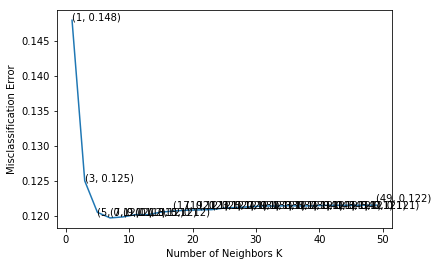

the misclassification error for each k value is :  [0.148 0.125 0.12  0.12  0.12  0.12  0.12  0.12  0.121 0.121 0.121 0.121
 0.121 0.121 0.121 0.121 0.121 0.121 0.121 0.121 0.121 0.121 0.121 0.121
 0.122]


In [94]:
# creating odd list of K for KNN for BoW
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, bow_x_1, y_1, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

## Applying optimal k on test data to get the accuracy with optimal k=7

In [50]:
knn = KNeighborsClassifier(7)
knn.fit(bow_x_tr,y_tr)
pred = knn.predict(bow_x_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 7 is %d%%' % (acc))


****Test accuracy for k = 7 is 89%


## Applying optimal k with knn(kd-tree) on test data to get the accuracy with optimal k=3

In [147]:
knn = KNeighborsClassifier(3,algorithm='kd_tree', leaf_size=30)
knn.fit(bow_x_tr,y_tr)
pred = knn.predict(bow_x_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 3 is %d%%' % (acc))


****Test accuracy for k = 3 is 88%


## Applying optimal k on test data to get micro the f1_score with optimal k=7

In [121]:
knn = KNeighborsClassifier(7)
knn.fit(bow_x_tr,y_tr)
pred = knn.predict(bow_x_test)
acc = f1_score(y_test, pred,  average='micro') * float(100)
print('\n****Test micro f1_acore for k = 7 is %d%%' % (acc))


****Test micro f1_acore for k = 7 is 89%


## knn(kd-tree) finding optimal k with train and cv data by applying knn with micro f1_score

In [164]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', leaf_size=30)

    # fitting the model on crossvalidation train
    knn.fit(bow_x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(bow_x_cv)

    # evaluate CV accuracy
    acc = f1_score(y_cv, pred, average='micro') * float(100)
    print('\nkd-tree CV macro f1_score for k = %d is %d%%' % (i, acc))


kd-tree CV macro f1_score for k = 1 is 85%

kd-tree CV macro f1_score for k = 3 is 88%

kd-tree CV macro f1_score for k = 5 is 88%

kd-tree CV macro f1_score for k = 7 is 88%

kd-tree CV macro f1_score for k = 9 is 88%

kd-tree CV macro f1_score for k = 11 is 88%

kd-tree CV macro f1_score for k = 13 is 88%

kd-tree CV macro f1_score for k = 15 is 88%

kd-tree CV macro f1_score for k = 17 is 88%

kd-tree CV macro f1_score for k = 19 is 88%

kd-tree CV macro f1_score for k = 21 is 88%

kd-tree CV macro f1_score for k = 23 is 88%

kd-tree CV macro f1_score for k = 25 is 88%

kd-tree CV macro f1_score for k = 27 is 88%

kd-tree CV macro f1_score for k = 29 is 88%


## Applying optimal on knn(kd-tree) k on test data to get micro the f1_score with optimal k=3

In [148]:
knn = KNeighborsClassifier(3,algorithm='kd_tree', leaf_size=30)
knn.fit(bow_x_tr,y_tr)
pred = knn.predict(bow_x_test)
acc = f1_score(y_test, pred,  average='micro') * float(100)
print('\n****knn kd-tree Test micro f1_acore for k = 3 is %d%%' % (acc))


****knn kd-tree Test micro f1_acore for k = 3 is 88%


## apply confusion matrix  on bow

In [52]:
# apply confusion matrix 
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(7)
knn.fit(bow_x_tr,y_tr)
pred = knn.predict(bow_x_test)
# acc = accuracy_score(y_test, pred, normalize=True) * float(100)
# print('\n****Test accuracy for k = 5 is %d%%' % (acc))
bow_confusion_matrix = confusion_matrix(y_test, pred)
bow_confusion_matrix

array([[   59,  1949],
       [   26, 15966]], dtype=int64)

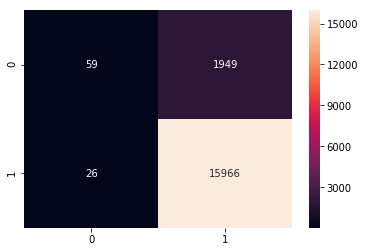

In [53]:
import seaborn as sns; 
ax = sns.heatmap(bow_confusion_matrix,annot=bow_confusion_matrix, fmt='')

# tfidf

In [59]:
#tfidf 
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
vocabulary = tf_idf_vect.fit(X_tr)
#print("the shape of out text BOW vectorizer ",tf_idf_x_tr.get_shape())

In [60]:
tf_idf_x_tr = tf_idf_vect.transform(X_tr)
print("the shape of out text BOW vectorizer ",tf_idf_x_tr.get_shape())

the shape of out text BOW vectorizer  (29400, 492757)


In [61]:
tf_idf_x_cv = tf_idf_vect.transform(X_cv)
print("the shape of out text BOW vectorizer ",tf_idf_x_cv.get_shape())

the shape of out text BOW vectorizer  (12600, 492757)


In [62]:
tf_idf_x_test= tf_idf_vect.transform(X_test)
print("the shape of out text BOW vectorizer ",tf_idf_x_test.get_shape())

the shape of out text BOW vectorizer  (18000, 492757)


In [63]:
tf_idf_x_1= tf_idf_vect.transform(X_1)
print("the shape of out text BOW vectorizer ",tf_idf_x_1.get_shape())

the shape of out text BOW vectorizer  (42000, 492757)


In [64]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(tf_idf_x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(tf_idf_x_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
# knn = KNeighborsClassifier(1)
# knn.fit(X_tr,y_tr)
# pred = knn.predict(X_test)
# acc = accuracy_score(y_test, pred, normalize=True) * float(100)
# print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 85%

CV accuracy for k = 3 is 88%

CV accuracy for k = 5 is 89%

CV accuracy for k = 7 is 89%

CV accuracy for k = 9 is 89%

CV accuracy for k = 11 is 89%

CV accuracy for k = 13 is 89%

CV accuracy for k = 15 is 89%

CV accuracy for k = 17 is 89%

CV accuracy for k = 19 is 89%

CV accuracy for k = 21 is 89%

CV accuracy for k = 23 is 89%

CV accuracy for k = 25 is 89%

CV accuracy for k = 27 is 89%

CV accuracy for k = 29 is 89%


## getting optimal k with acc on train and cv with knn kd-tree 

In [151]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', leaf_size=30)

    # fitting the model on crossvalidation train
    knn.fit(tf_idf_x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(tf_idf_x_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nkd-tree CV accuracy for k = %d is %d%%' % (i, acc))
    
# knn = KNeighborsClassifier(1)
# knn.fit(X_tr,y_tr)
# pred = knn.predict(X_test)
# acc = accuracy_score(y_test, pred, normalize=True) * float(100)
# print('\n****Test accuracy for k = 1 is %d%%' % (acc))


kd-tree CV accuracy for k = 1 is 85%

kd-tree CV accuracy for k = 3 is 88%

kd-tree CV accuracy for k = 5 is 89%

kd-tree CV accuracy for k = 7 is 89%

kd-tree CV accuracy for k = 9 is 89%

kd-tree CV accuracy for k = 11 is 89%

kd-tree CV accuracy for k = 13 is 89%

kd-tree CV accuracy for k = 15 is 89%

kd-tree CV accuracy for k = 17 is 89%

kd-tree CV accuracy for k = 19 is 89%

kd-tree CV accuracy for k = 21 is 89%

kd-tree CV accuracy for k = 23 is 89%

kd-tree CV accuracy for k = 25 is 89%

kd-tree CV accuracy for k = 27 is 89%

kd-tree CV accuracy for k = 29 is 89%


## (tfidf) finding optimal k with train and cv data by applying knn with micro f1_score 

In [65]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(tf_idf_x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(tf_idf_x_cv)

    # evaluate CV accuracy
    acc = f1_score(y_cv, pred, average='micro') * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))


CV accuracy for k = 1 is 85%

CV accuracy for k = 3 is 88%

CV accuracy for k = 5 is 89%

CV accuracy for k = 7 is 89%

CV accuracy for k = 9 is 89%

CV accuracy for k = 11 is 89%

CV accuracy for k = 13 is 89%

CV accuracy for k = 15 is 89%

CV accuracy for k = 17 is 89%

CV accuracy for k = 19 is 89%

CV accuracy for k = 21 is 89%

CV accuracy for k = 23 is 89%

CV accuracy for k = 25 is 89%

CV accuracy for k = 27 is 89%

CV accuracy for k = 29 is 89%


## getting optimal k with f1_score on train and cv with knn kd-tree

In [152]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', leaf_size=30)

    # fitting the model on crossvalidation train
    knn.fit(tf_idf_x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(tf_idf_x_cv)

    # evaluate CV accuracy
    acc = f1_score(y_cv, pred, average='micro') * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))


CV accuracy for k = 1 is 85%

CV accuracy for k = 3 is 88%

CV accuracy for k = 5 is 89%

CV accuracy for k = 7 is 89%

CV accuracy for k = 9 is 89%

CV accuracy for k = 11 is 89%

CV accuracy for k = 13 is 89%

CV accuracy for k = 15 is 89%

CV accuracy for k = 17 is 89%

CV accuracy for k = 19 is 89%

CV accuracy for k = 21 is 89%

CV accuracy for k = 23 is 89%

CV accuracy for k = 25 is 89%

CV accuracy for k = 27 is 89%

CV accuracy for k = 29 is 89%



The optimal number of neighbors is 7.


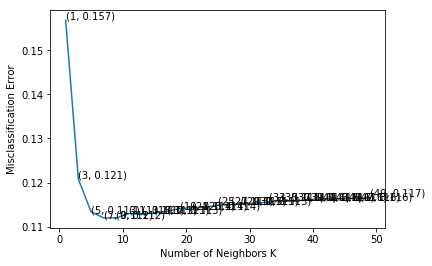

the misclassification error for each k value is :  [0.157 0.121 0.113 0.112 0.112 0.113 0.113 0.113 0.113 0.114 0.114 0.114
 0.115 0.115 0.115 0.115 0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116
 0.117]


In [175]:
# creating odd list of K for KNN for tfidf
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, tf_idf_x_1, y_1, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

## (tfidf)now with optimal value of k applying it on test dataset i.e k= 7

In [66]:
knn = KNeighborsClassifier(7)
knn.fit(tf_idf_x_tr,y_tr)
pred = knn.predict(tf_idf_x_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 7 is %d%%' % (acc))


****Test accuracy for k = 7 is 89%


## (tfidf knn(kd-tree))now with optimal value of k applying it on test dataset i.e k= 5

In [154]:
knn = KNeighborsClassifier(5,algorithm='kd_tree', leaf_size=30)
knn.fit(tf_idf_x_tr,y_tr)
pred = knn.predict(tf_idf_x_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****kd-tree Test accuracy for k = 5 is %d%%' % (acc))


****kd-tree Test accuracy for k = 5 is 89%


## (tfidf)now with optimal value of k applying micro f1_score it on test dataset i.e k= 7

In [119]:
knn = KNeighborsClassifier(7)
knn.fit(tf_idf_x_tr,y_tr)
pred = knn.predict(tf_idf_x_test)
acc = f1_score(y_test, pred, average='micro') * float(100)
print('\n****Test micro f1_score for k = 7 is %d%%' % (acc))


****Test micro f1_score for k = 7 is 89%


## (tfidf kd-tree)now with optimal value of k applying micro f1_score it on test dataset i.e k= 5

In [155]:
knn = KNeighborsClassifier(5,algorithm='kd_tree', leaf_size=30)
knn.fit(tf_idf_x_tr,y_tr)
pred = knn.predict(tf_idf_x_test)
acc = f1_score(y_test, pred, average='micro') * float(100)
print('\n****Test micro f1_score for k = 5 is %d%%' % (acc))


****Test micro f1_score for k = 5 is 89%


## apply confusion matrix  on tfidf

In [68]:
# apply confusion matrix 
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(5)
knn.fit(tf_idf_x_tr,y_tr)
pred = knn.predict(tf_idf_x_test)
# acc = accuracy_score(y_test, pred, normalize=True) * float(100)
# print('\n****Test accuracy for k = 5 is %d%%' % (acc))
tfidf_coufusion_matrix = confusion_matrix(y_test, pred)
tfidf_coufusion_matrix

array([[  305,  1703],
       [  170, 15822]], dtype=int64)

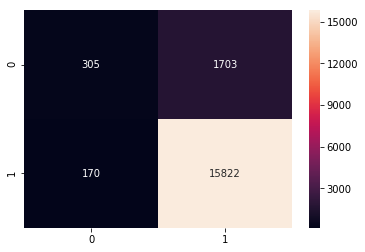

In [69]:
ax = sns.heatmap(tfidf_coufusion_matrix,annot=tfidf_coufusion_matrix, fmt='')

# Word2Vec  

In [80]:
#Word2Vec mode 
# Train your own Word2Vec model using your own text corpus
i=0
X_tr_list_of_sent=[]
for sent in X_tr:
    X_tr_list_of_sent.append(sent.split())
    
print(len(X_tr))
print("\n--------------Spliting each sentence into words--------word list of ie data corpus---------\n")
print(X_tr_list_of_sent[:2])
#word list of ie data corpus

29400

--------------Spliting each sentence into words--------word list of ie data corpus---------

[['fantast', 'green', 'oliv', 'flavour', 'put', 'salad', 'kill', 'tast'], ['big', 'fan', 'salad', 'dress', 'made', 'tasti', 'stuff', 'tangi', 'without', 'vinegar', 'tast', 'wont', 'eat', 'anyth', 'els', 'salad']]


In [79]:
#The Word to Vec model produces a vocabulary, with each word being represented by 
#an n-dimensional numpy array 
X_tr_w2v_model=Word2Vec(X_tr_list_of_sent,min_count=1,size=50, workers=4)
X_tr_w2v_model.wv['man']
wlist =list(X_tr_w2v_model.wv.vocab)
# wlist is a list of words 
len(wlist)


21148

# avg-w2v

In [138]:
#avg-w2v
#labels = []
X_tr_w2v_model_tokens = []

for word in X_tr_w2v_model.wv.vocab:
    X_tr_w2v_model_tokens.append(X_tr_w2v_model[word])
    #labels.append(word)
    
# print(len(tokens));
X_tr_w2v_model_tokens = np.array(X_tr_w2v_model_tokens)
X_tr_w2v_model_tokens
print("the shape of out text BOW vectorizer ",X_tr_w2v_model_tokens.shape)

the shape of out text BOW vectorizer  (26698, 50)


## CALCULATE AVG WORD2VEC FOR x_tr

In [84]:
#CALCULATE AVG WORD2VEC FOR x_tr
w2v_words = list(X_tr_w2v_model.wv.vocab)
# print("number of words that occured minimum 5 times ",len(w2v_words))
# print("sample words ", w2v_words[0:50])
# average Word2Vec
# compute average word2vec for each review.
X_tr_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_tr_list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = X_tr_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    X_tr_sent_vectors.append(sent_vec)
print(len(X_tr_sent_vectors))
print(len(X_tr_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 29400/29400 [00:52<00:00, 565.22it/s]


29400
50


In [122]:
#X_tr_sent_vectors[0]


# cv for Avgword2vec

In [87]:
# Train your own Word2Vec model using your own text corpus
i=0
X_cv_list_of_sent=[]
for sent in X_cv:
    X_cv_list_of_sent.append(sent.split())
    
print(X_cv[0])
print("\n--------------Spliting each sentence into words--------word list of ie data corpus---------\n")
print(X_cv_list_of_sent[:2])
#word list of ie data corpus

love snapea crisp daughter friend want case birthday shipment quick perfect condit delici usual

--------------Spliting each sentence into words--------word list of ie data corpus---------

[['love', 'snapea', 'crisp', 'daughter', 'friend', 'want', 'case', 'birthday', 'shipment', 'quick', 'perfect', 'condit', 'delici', 'usual'], ['receiv', 'sampl', 'babi', 'fair', 'first', 'cup', 'third', 'day', 'low', 'lot', 'stress', 'sleep', 'etc', 'five', 'hour', 'drink', 'tea', 'use', 'pump', 'quantiti', 'notic', 'amaz', 'increas', 'convinc', 'custom']]


# CALCULATE AVG WORD2VEC FOR x_cv  

In [92]:
#CALCULATE AVG WORD2VEC FOR x_tr  
# w2v_words = list(X_cv_w2v_model.wv.vocab)
w2v_words = list(X_tr_w2v_model.wv.vocab)

# print("number of words that occured minimum 5 times ",len(w2v_words))
# print("sample words ", w2v_words[0:50])
# average Word2Vec
# compute average word2vec for each review.
X_cv_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_cv_list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
#             vec = X_cv_w2v_model.wv[word]
            vec = X_tr_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    X_cv_sent_vectors.append(sent_vec)
print(len(X_cv_sent_vectors))
print(len(X_cv_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 12600/12600 [00:28<00:00, 437.55it/s]


12600
50


# Test for Avgword2vec

In [94]:
# Train your own Word2Vec model using your own text corpus
i=0
X_test_list_of_sent=[]
for sent in X_test:
    X_test_list_of_sent.append(sent.split())
    
print(X_cv[0])
print("\n--------------Spliting each sentence into words--------word list of ie data corpus---------\n")
print(X_test_list_of_sent[:2])
#word list of ie data corpus

#The Word to Vec model produces a vocabulary, with each word being represented by 
#an n-dimensional numpy array 

#change

# X_test_w2v_model=Word2Vec(X_test_list_of_sent,min_count=5,size=50, workers=4)
# X_test_w2v_model.wv['man']

love snapea crisp daughter friend want case birthday shipment quick perfect condit delici usual

--------------Spliting each sentence into words--------word list of ie data corpus---------

[['pretzel', 'suppos', 'salti', 'tad', 'salti', 'also', 'burnt', 'flavor', 'could', 'say', 'distinct', 'smokey', 'flavor', 'bag', 'ahead', 'prospect', 'unsatisfi', 'pallett', 'mighti', 'tall', 'order', 'hand', 'subtl', 'sweet', 'flavor', 'good', 'ordinari', 'pretzel', 'tri', 'safeti', 'first', 'instead', 'buy', 'bag', 'also', 'note', 'groceri', 'item', 'cannot', 'return', 'amazon'], ['tabbi', 'usual', 'find', 'treat', 'food', 'interest', 'week', 'could', 'care', 'less', 'greeni', 'mark', 'yet', 'refus', 'treat', 'twice', 'day', 'compli', 'demand', 'hit', 'toss', 'treat', 'cubbi', 'aka', 'crack', 'hous', 'gotta', 'get', 'hand', 'fast', 'greeni', 'defin', 'worth', 'happi', 'albeit', 'addict', 'cat']]


In [95]:
#labels = []

#chnage

# X_test_w2v_model_tokens = []

# for word in X_test_w2v_model.wv.vocab:
#     X_test_w2v_model_tokens.append(X_test_w2v_model[word])
    
# X_test_w2v_model_tokens = np.array(X_test_w2v_model_tokens)
# X_test_w2v_model_tokens
# print("the shape of out text BOW vectorizer ",X_cv_w2v_model_tokens.shape)

## CALCULATE AVG WORD2VEC FOR x_test

In [96]:
#CALCULATE AVG WORD2VEC FOR x_test
# w2v_words = list(X_test_w2v_model.wv.vocab)

w2v_words = list(X_tr_w2v_model.wv.vocab)
# print("number of words that occured minimum 5 times ",len(w2v_words))
# print("sample words ", w2v_words[0:50])
# average Word2Vec
# compute average word2vec for each review.
X_test_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_test_list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
#             vec = X_test_w2v_model.wv[word]
            vec = X_tr_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    X_test_sent_vectors.append(sent_vec)
print(len(X_test_sent_vectors))
print(len(X_test_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 18000/18000 [00:36<00:00, 499.96it/s]


18000
50


In [ ]:
X_test_sent_vectors[0]

## now finding the optimal K with acc matrix on avg w2vec

In [97]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_sent_vectors, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv_sent_vectors)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))


CV accuracy for k = 1 is 85%

CV accuracy for k = 3 is 88%

CV accuracy for k = 5 is 89%

CV accuracy for k = 7 is 89%

CV accuracy for k = 9 is 89%

CV accuracy for k = 11 is 89%

CV accuracy for k = 13 is 89%

CV accuracy for k = 15 is 89%

CV accuracy for k = 17 is 89%

CV accuracy for k = 19 is 89%

CV accuracy for k = 21 is 89%

CV accuracy for k = 23 is 89%

CV accuracy for k = 25 is 89%

CV accuracy for k = 27 is 89%

CV accuracy for k = 29 is 89%


## now knn(kd-tree) finding the optimal K with acc matrix on avg w2vec

In [156]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', leaf_size=30)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_sent_vectors, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv_sent_vectors)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nkd-tree CV accuracy for k = %d is %d%%' % (i, acc))


kd-tree CV accuracy for k = 1 is 85%

kd-tree CV accuracy for k = 3 is 88%

kd-tree CV accuracy for k = 5 is 89%

kd-tree CV accuracy for k = 7 is 89%

kd-tree CV accuracy for k = 9 is 89%

kd-tree CV accuracy for k = 11 is 89%

kd-tree CV accuracy for k = 13 is 89%

kd-tree CV accuracy for k = 15 is 89%

kd-tree CV accuracy for k = 17 is 89%

kd-tree CV accuracy for k = 19 is 89%

kd-tree CV accuracy for k = 21 is 89%

kd-tree CV accuracy for k = 23 is 89%

kd-tree CV accuracy for k = 25 is 89%

kd-tree CV accuracy for k = 27 is 89%

kd-tree CV accuracy for k = 29 is 89%


## applying optimal value of k on the test data i.e k = 5

In [99]:
knn = KNeighborsClassifier(5)
knn.fit(X_tr_sent_vectors,y_tr)
pred = knn.predict(X_test_sent_vectors)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 5 is %d%%' % (acc))


****Test accuracy for k = 5 is 89%


## knn(kd-tree) applying optimal value of k on the test data i.e k = 5

In [157]:
knn = KNeighborsClassifier(5,algorithm='kd_tree', leaf_size=30)
knn.fit(X_tr_sent_vectors,y_tr)
pred = knn.predict(X_test_sent_vectors)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****kd-tree Test accuracy for k = 5 is %d%%' % (acc))


****kd-tree Test accuracy for k = 5 is 89%


## now finding the optimal K with micro f1_score matrix on avg w2vec

In [117]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_sent_vectors, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv_sent_vectors)

    # evaluate CV accuracy
    acc = f1_score(y_cv, pred, average='micro') * float(100)
    print('\nCV micro f1_score for k = %d is %d%%' % (i, acc))


CV micro f1_score for k = 1 is 85%

CV micro f1_score for k = 3 is 88%

CV micro f1_score for k = 5 is 89%

CV micro f1_score for k = 7 is 89%

CV micro f1_score for k = 9 is 89%

CV micro f1_score for k = 11 is 89%

CV micro f1_score for k = 13 is 89%

CV micro f1_score for k = 15 is 89%

CV micro f1_score for k = 17 is 89%

CV micro f1_score for k = 19 is 89%

CV micro f1_score for k = 21 is 89%

CV micro f1_score for k = 23 is 89%

CV micro f1_score for k = 25 is 89%

CV micro f1_score for k = 27 is 89%

CV micro f1_score for k = 29 is 89%


## knn(kd-tree) now finding the optimal K with micro f1_score matrix on avg w2vec

In [158]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', leaf_size=30)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_sent_vectors, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv_sent_vectors)

    # evaluate CV accuracy
    acc = f1_score(y_cv, pred, average='micro') * float(100)
    print('\nCV micro f1_score for k = %d is %d%%' % (i, acc))


CV micro f1_score for k = 1 is 85%

CV micro f1_score for k = 3 is 88%

CV micro f1_score for k = 5 is 89%

CV micro f1_score for k = 7 is 89%

CV micro f1_score for k = 9 is 89%

CV micro f1_score for k = 11 is 89%

CV micro f1_score for k = 13 is 89%

CV micro f1_score for k = 15 is 89%

CV micro f1_score for k = 17 is 89%

CV micro f1_score for k = 19 is 89%

CV micro f1_score for k = 21 is 89%

CV micro f1_score for k = 23 is 89%

CV micro f1_score for k = 25 is 89%

CV micro f1_score for k = 27 is 89%

CV micro f1_score for k = 29 is 89%


## applying optimal value of k on the test data for micro f1_score i.e k = 5 

In [118]:
knn = KNeighborsClassifier(5)
knn.fit(X_tr_sent_vectors,y_tr)
pred = knn.predict(X_test_sent_vectors)
acc = f1_score(y_test, pred, average='micro') * float(100)
print('\n****Test f1_score for k = 5 is %d%%' % (acc))


****Test f1_score for k = 5 is 89%


## knn(kd-tree) applying optimal value of k on the test data for micro f1_score i.e k = 5

In [160]:
knn = KNeighborsClassifier(5,algorithm='kd_tree', leaf_size=30)
knn.fit(X_tr_sent_vectors,y_tr)
pred = knn.predict(X_test_sent_vectors)
acc = f1_score(y_test, pred, average='micro') * float(100)
print('\n****kd-tree Test f1_score for k = 5 is %d%%' % (acc))


****kd-tree Test f1_score for k = 5 is 89%


## apply confusion matrix on avg w2vec

In [100]:
# apply confusion matrix 
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(5)
knn.fit(X_tr_sent_vectors,y_tr)
pred = knn.predict(X_test_sent_vectors)
# acc = accuracy_score(y_test, pred, normalize=True) * float(100)
# print('\n****Test accuracy for k = 5 is %d%%' % (acc))
avgw2vec_confusion_matrix = confusion_matrix(y_test, pred)
avgw2vec_confusion_matrix

array([[  442,  1566],
       [  360, 15632]], dtype=int64)

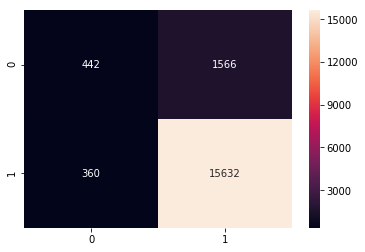

In [101]:
ax = sns.heatmap(avgw2vec_confusion_matrix,annot=avgw2vec_confusion_matrix, fmt='')

# TF-IDF weighted Word2Vec

## TF-IDF weighted Word2Vec for c_tr ie train 

In [104]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))

In [105]:
#--new way TF-IDF weighted Word2Vec
   # TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

X_tr_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(X_tr_list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = X_tr_w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    X_tr_tfidf_sent_vectors.append(sent_vec)
    row += 1

#--------------------------------------------------new way

100%|███████████████████████████████████████████████████████████████████████████| 29400/29400 [01:00<00:00, 483.38it/s]


In [106]:
print(len(X_tr_tfidf_sent_vectors))
print(len(X_tr_tfidf_sent_vectors[0]))

29400
50


In [107]:
X_tr_tfidf_sent_vectors[0]

array([-6.61325196e-01,  4.27122573e-01, -6.17071775e-02,  4.26272240e-01,
        2.96406332e-01,  1.33749806e-01,  1.90408915e-02,  1.17200801e+00,
       -5.88594656e-01,  1.08146709e+00,  3.38193973e-01,  1.07745229e+00,
        3.01946412e-01,  3.64909926e-01,  1.02687939e+00,  7.08874548e-01,
       -8.28193983e-01,  4.42295794e-02, -5.91197902e-01, -5.93715859e-01,
       -2.71983118e-01,  3.91163739e-01,  7.25811769e-01,  3.88467067e-02,
       -5.35117497e-01,  4.42828302e-01,  5.89562812e-04, -3.22835917e-01,
       -3.25983744e-01, -7.43865234e-01, -8.88674506e-01,  6.42316537e-01,
        9.43803343e-01,  3.87417376e-01, -2.87904865e-01, -4.44882784e-01,
        3.20912573e-01,  2.88022084e-01, -1.25983951e+00, -4.24662029e-01,
       -8.60205668e-01, -7.80621078e-02, -5.59232485e-03,  3.64157690e-01,
       -2.22466741e-01,  1.59019920e-01, -1.40498116e-02,  1.97809404e-01,
        8.48159916e-01,  4.71295370e-01])

## TF-IDF weighted Word2Vec for cv 

In [108]:
#--new way TF-IDF weighted Word2Vec for cv with train data 
   # TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

X_cv_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(X_cv_list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = X_tr_w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    X_cv_tfidf_sent_vectors.append(sent_vec)
    row += 1

#--------------------------------------------------new way
print(len(X_cv_tfidf_sent_vectors))
print(len(X_cv_tfidf_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 12600/12600 [00:28<00:00, 436.72it/s]


12600
50


## TF-IDF weighted Word2Vec for X_test ie test 

In [205]:
# TF-IDF weighted Word2Vec for X_test ie test 
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

X_test_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in X_test_list_of_sent: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = X_test_w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = tf_idf_x_test[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    
    sent_vec /= weight_sum
    X_test_tfidf_sent_vectors.append(sent_vec)
    row += 1
    
print(len(X_test_tfidf_sent_vectors))
print(len(X_test_tfidf_sent_vectors[0]))

30000
50


In [109]:
#--new way TF-IDF weighted Word2Vec for cv with train data 
   # TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

X_test_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(X_test_list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = X_tr_w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    X_test_tfidf_sent_vectors.append(sent_vec)
    row += 1

#--------------------------------------------------new way
print(len(X_test_tfidf_sent_vectors))
print(len(X_test_tfidf_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 18000/18000 [00:40<00:00, 441.17it/s]


18000
50


## apply knn on TF-IDF weighted Word2Vec for train and cv to get optimal k with acc matrix

In [110]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_tfidf_sent_vectors, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv_tfidf_sent_vectors)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))


CV accuracy for k = 1 is 84%

CV accuracy for k = 3 is 87%

CV accuracy for k = 5 is 88%

CV accuracy for k = 7 is 88%

CV accuracy for k = 9 is 89%

CV accuracy for k = 11 is 89%

CV accuracy for k = 13 is 89%

CV accuracy for k = 15 is 89%

CV accuracy for k = 17 is 89%

CV accuracy for k = 19 is 89%

CV accuracy for k = 21 is 89%

CV accuracy for k = 23 is 89%

CV accuracy for k = 25 is 89%

CV accuracy for k = 27 is 89%

CV accuracy for k = 29 is 89%


## knn(kd-tree) apply knn on TF-IDF weighted Word2Vec for train and cv to get optimal k with acc matrix

In [159]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', leaf_size=30)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_tfidf_sent_vectors, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv_tfidf_sent_vectors)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nkd-tree CV accuracy for k = %d is %d%%' % (i, acc))


kd-tree CV accuracy for k = 1 is 84%

kd-tree CV accuracy for k = 3 is 87%

kd-tree CV accuracy for k = 5 is 88%

kd-tree CV accuracy for k = 7 is 88%

kd-tree CV accuracy for k = 9 is 89%

kd-tree CV accuracy for k = 11 is 89%

kd-tree CV accuracy for k = 13 is 89%

kd-tree CV accuracy for k = 15 is 89%

kd-tree CV accuracy for k = 17 is 89%

kd-tree CV accuracy for k = 19 is 89%

kd-tree CV accuracy for k = 21 is 89%

kd-tree CV accuracy for k = 23 is 89%

kd-tree CV accuracy for k = 25 is 89%

kd-tree CV accuracy for k = 27 is 89%

kd-tree CV accuracy for k = 29 is 89%


## now with optimal value of k apply it on test data i.e k = 9

In [111]:
knn = KNeighborsClassifier(9)
knn.fit(X_tr_tfidf_sent_vectors,y_tr)
pred = knn.predict(X_test_tfidf_sent_vectors)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 9 is %d%%' % (acc))


****Test accuracy for k = 9 is 89%


## kd-tree now with optimal value of k apply it on test data i.e k = 9

In [161]:
knn = KNeighborsClassifier(9,algorithm='kd_tree', leaf_size=30)
knn.fit(X_tr_tfidf_sent_vectors,y_tr)
pred = knn.predict(X_test_tfidf_sent_vectors)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****kd-tree Test accuracy for k = 9 is %d%%' % (acc))


****kd-tree Test accuracy for k = 9 is 89%


## apply knn on TF-IDF weighted Word2Vec for train and cv to get optimal k with micro F1_Score matrix

In [114]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_tfidf_sent_vectors, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv_tfidf_sent_vectors)

    # evaluate CV accuracy
    acc = f1_score(y_cv, pred, average='micro') * float(100)
    print('\nCV micro fl_score  for k = %d is %d%%' % (i, acc))


CV micro fl_score  for k = 1 is 84%

CV micro fl_score  for k = 3 is 87%

CV micro fl_score  for k = 5 is 88%

CV micro fl_score  for k = 7 is 88%

CV micro fl_score  for k = 9 is 89%

CV micro fl_score  for k = 11 is 89%

CV micro fl_score  for k = 13 is 89%

CV micro fl_score  for k = 15 is 89%

CV micro fl_score  for k = 17 is 89%

CV micro fl_score  for k = 19 is 89%

CV micro fl_score  for k = 21 is 89%

CV micro fl_score  for k = 23 is 89%

CV micro fl_score  for k = 25 is 89%

CV micro fl_score  for k = 27 is 89%

CV micro fl_score  for k = 29 is 89%


## apply knn(kd-tree) on TF-IDF weighted Word2Vec for train and cv to get optimal k with micro F1_Score matrix

In [162]:
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree', leaf_size=30)

    # fitting the model on crossvalidation train
    knn.fit(X_tr_tfidf_sent_vectors, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv_tfidf_sent_vectors)

    # evaluate CV accuracy
    acc = f1_score(y_cv, pred, average='micro') * float(100)
    print('\nkd-tree CV micro fl_score  for k = %d is %d%%' % (i, acc))


kd-tree CV micro fl_score  for k = 1 is 84%

kd-tree CV micro fl_score  for k = 3 is 87%

kd-tree CV micro fl_score  for k = 5 is 88%

kd-tree CV micro fl_score  for k = 7 is 88%

kd-tree CV micro fl_score  for k = 9 is 89%

kd-tree CV micro fl_score  for k = 11 is 89%

kd-tree CV micro fl_score  for k = 13 is 89%

kd-tree CV micro fl_score  for k = 15 is 89%

kd-tree CV micro fl_score  for k = 17 is 89%

kd-tree CV micro fl_score  for k = 19 is 89%

kd-tree CV micro fl_score  for k = 21 is 89%

kd-tree CV micro fl_score  for k = 23 is 89%

kd-tree CV micro fl_score  for k = 25 is 89%

kd-tree CV micro fl_score  for k = 27 is 89%

kd-tree CV micro fl_score  for k = 29 is 89%


## now with optimal value of k apply it on test data i.e k = 9 with micro f1_score 

In [128]:
knn = KNeighborsClassifier(9)
knn.fit(X_tr_tfidf_sent_vectors, y_tr)
pred = knn.predict(X_test_tfidf_sent_vectors)
acc = f1_score(y_test, pred, average='micro') * float(100)
print('\nCV micro fl_score  for k = 9 is %d%%' % ( acc))


CV micro fl_score  for k = 9 is 89%


## knn(kd-tree) now with optimal value of k apply it on test data i.e k = 9 with micro f1_score

In [163]:
knn = KNeighborsClassifier(9,algorithm='kd_tree', leaf_size=30)
knn.fit(X_tr_tfidf_sent_vectors, y_tr)
pred = knn.predict(X_test_tfidf_sent_vectors)
acc = f1_score(y_test, pred, average='micro') * float(100)
print('\nkd-tree CV micro fl_score  for k = 9 is %d%%' % ( acc))


kd-tree CV micro fl_score  for k = 9 is 89%


## apply confusion matrix on tfidf_avg_w2vec

In [112]:
# apply confusion matrix 
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(5)
knn.fit(X_tr_tfidf_sent_vectors,y_tr)
pred = knn.predict(X_test_tfidf_sent_vectors)
# acc = accuracy_score(y_test, pred, normalize=True) * float(100)
# print('\n****Test accuracy for k = 5 is %d%%' % (acc))
tfidf_avg_w2vec_confusion_matrix = confusion_matrix(y_test, pred)
tfidf_avg_w2vec_confusion_matrix

array([[  423,  1585],
       [  396, 15596]], dtype=int64)

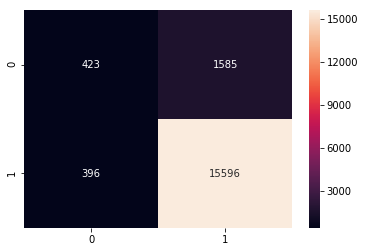

In [113]:
ax = sns.heatmap(tfidf_avg_w2vec_confusion_matrix,annot=tfidf_avg_w2vec_confusion_matrix, fmt='')

#  conclusions section

In [165]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "FE","opt k(acc)", "train acc", " test acc","opt k(f1_score)","train f1_score", " test f1_score"]

x.add_row(["knn ","BOW","k=7 ", "88%","89%" ,"k=7" ,"88%","89%"])
x.add_row(["knn ","TFIDF","k=7 ", "89%","89%" ,"k=7" ,"89%","89%"])
x.add_row(["knn ","avg-w2v","k=5 ", "89%","89%" ,"k=5" ,"89%","89%"])
x.add_row(["knn ","TF-IDF wei W2Vec","k=9 ", "89%","89%" ,"k=9" ,"89%","89%"])
x.add_row(["knn (kd-tree) ","BOW","k=3 ", "88%","88%" ,"k=3" ,"88%","88%"])
x.add_row(["knn (kd-tree)","TFIDF","k=5 ", "89%","89%" ,"k=5" ,"89%","89%"])
x.add_row(["knn (kd-tree) ","avg-w2v","k=5 ", "89%","89%" ,"k=5" ,"89%","89%"])
x.add_row(["knn (kd-tree)","TF-IDF wei W2Vec","k=9 ", "89%","89%" ,"k=9" ,"89%","89%"])


print(x)

+----------------+------------------+------------+-----------+-----------+-----------------+----------------+----------------+
|     Model      |        FE        | opt k(acc) | train acc |  test acc | opt k(f1_score) | train f1_score |  test f1_score |
+----------------+------------------+------------+-----------+-----------+-----------------+----------------+----------------+
|      knn       |       BOW        |    k=7     |    88%    |    89%    |       k=7       |      88%       |      89%       |
|      knn       |      TFIDF       |    k=7     |    89%    |    89%    |       k=7       |      89%       |      89%       |
|      knn       |     avg-w2v      |    k=5     |    89%    |    89%    |       k=5       |      89%       |      89%       |
|      knn       | TF-IDF wei W2Vec |    k=9     |    89%    |    89%    |       k=9       |      89%       |      89%       |
| knn (kd-tree)  |       BOW        |    k=3     |    88%    |    88%    |       k=3       |      88%       |  